In [126]:
# Importación de librerias necesarias para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [127]:
#Importación de DataBase
df = pd.read_csv ("C:\\Users\\luiso\\Documents\\Big Data\\Modelos y Aprendizaje\\Trabajo Final\\breast+cancer+wisconsin+diagnostic\\wdbc.data")

In [128]:
#Asignamos los encabezados 
encabezados = ['Id','Diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se', 'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
df.columns= encabezados
df

,Id,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [129]:
#Estructura del DF
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       568 non-null    int64  
 1   Diagnosis                568 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [130]:
#Asignamos los valores numericos a la comlumna 1   Diagnosis                568 non-null    object 
df['Diagnosis']=df['Diagnosis'].map({'M':1,'B':0})
df

,Id,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [131]:
# Validamos el cambio
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       568 non-null    int64  
 1   Diagnosis                568 non-null    int64  
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [132]:
df.fillna(0,inplace= True )

In [133]:
#Transformamos las columnas 
df=df.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       568 non-null    int32
 1   Diagnosis                568 non-null    int32
 2   radius_mean              568 non-null    int32
 3   texture_mean             568 non-null    int32
 4   perimeter_mean           568 non-null    int32
 5   area_mean                568 non-null    int32
 6   smoothness_mean          568 non-null    int32
 7   compactness_mean         568 non-null    int32
 8   concavity_mean           568 non-null    int32
 9   concave points_mean      568 non-null    int32
 10  symmetry_mean            568 non-null    int32
 11  fractal_dimension_mean   568 non-null    int32
 12  radius_se                568 non-null    int32
 13  texture_se               568 non-null    int32
 14  perimeter_se             568 non-null    int32
 15  area_s

In [134]:
#Retiramos la primera columna del df
df.drop("Id",axis=1,inplace=True)
df

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,20,17,132,1326,0,0,0,0,0,...,24,23,158,1956,0,0,0,0,0,0
1,1,19,21,130,1203,0,0,0,0,0,...,23,25,152,1709,0,0,0,0,0,0
2,1,11,20,77,386,0,0,0,0,0,...,14,26,98,567,0,0,0,0,0,0
3,1,20,14,135,1297,0,0,0,0,0,...,22,16,152,1575,0,0,0,0,0,0
4,1,12,15,82,477,0,0,0,0,0,...,15,23,103,741,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,21,22,142,1479,0,0,0,0,0,...,25,26,166,2027,0,0,0,0,0,0
564,1,20,28,131,1261,0,0,0,0,0,...,23,38,155,1731,0,0,0,0,0,0
565,1,16,28,108,858,0,0,0,0,0,...,18,34,126,1124,0,0,0,0,0,0
566,1,20,29,140,1265,0,0,0,0,0,...,25,39,184,1821,0,0,0,0,0,0


In [135]:
#Dividimos los Datos conforme su categoria segun el detalle de la base de datos
grup_features_mean= list(df.columns[1:11])
grup_features_se= list(df.columns[11:20])
grup_features_worst=list(df.columns[21:31])

In [136]:
print(grup_features_mean)
print(grup_features_se)
print(grup_features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [137]:
#obtenermos un resumen estadistico
df.describe()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.0,568.0,568.0,568.0,568.0,...,568.000000,568.000000,568.000000,568.000000,568.0,568.000000,568.000000,568.0,568.0,568.0
mean,0.371479,13.632042,18.801056,91.431338,653.894366,0.0,0.0,0.0,0.0,0.0,...,15.769366,25.207746,106.676056,878.239437,0.0,0.001761,0.005282,0.0,0.0,0.0
std,0.483626,3.565486,4.311201,24.310503,352.058130,0.0,0.0,0.0,0.0,0.0,...,4.843364,6.151452,33.496963,568.012699,0.0,0.041959,0.072547,0.0,0.0,0.0
min,0.000000,6.000000,9.000000,43.000000,143.000000,0.0,0.0,0.0,0.0,0.0,...,7.000000,12.000000,50.000000,185.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,11.000000,16.000000,75.000000,419.750000,0.0,0.0,0.0,0.0,0.0,...,13.000000,21.000000,84.000000,514.750000,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,0.000000,13.000000,18.000000,86.000000,548.500000,0.0,0.0,0.0,0.0,0.0,...,14.000000,25.000000,97.000000,685.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.000000,15.000000,21.000000,103.250000,782.000000,0.0,0.0,0.0,0.0,0.0,...,18.000000,29.000000,125.000000,1073.500000,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.000000,28.000000,39.000000,188.000000,2501.000000,0.0,0.0,0.0,0.0,0.0,...,36.000000,49.000000,251.000000,4254.000000,0.0,1.000000,1.000000,0.0,0.0,0.0


In [138]:
#Asignamos una variable a un conjunto de datos 
data=df[["Diagnosis","radius_worst", "perimeter_worst","area_worst", "texture_worst"]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Diagnosis        568 non-null    int32
 1   radius_worst     568 non-null    int32
 2   perimeter_worst  568 non-null    int32
 3   area_worst       568 non-null    int32
 4   texture_worst    568 non-null    int32
dtypes: int32(5)
memory usage: 11.2 KB


In [139]:
#Definimos las variables para x y 
x=data[['radius_worst','texture_worst','perimeter_worst']]
y=data ['Diagnosis']

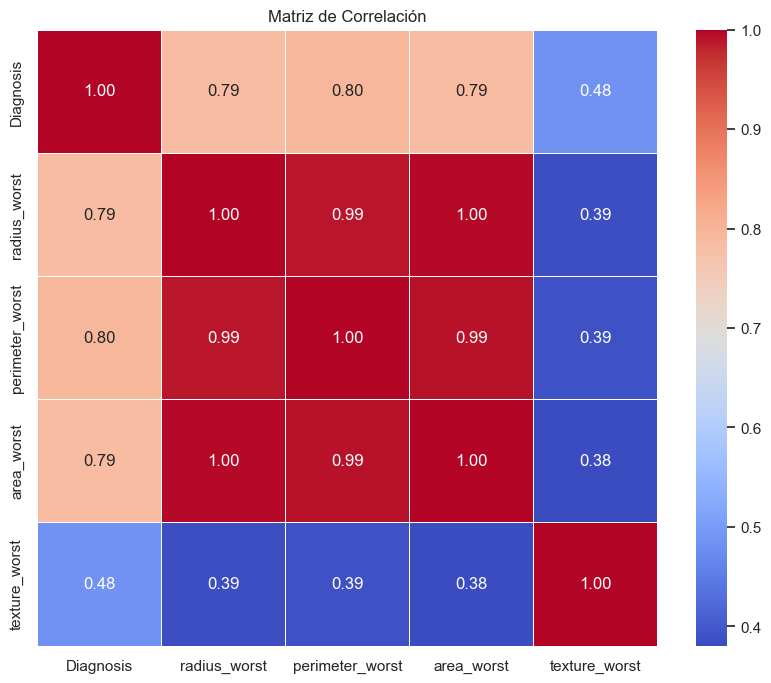

In [140]:
# Calculamos la matriz de correlacion con otro metodo (por ejemplo, Spearman)
corr_spearman = data.corr(method='spearman')
sns.set(style='whitegrid')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

<Axes: xlabel='perimeter_worst', ylabel='texture_worst'>

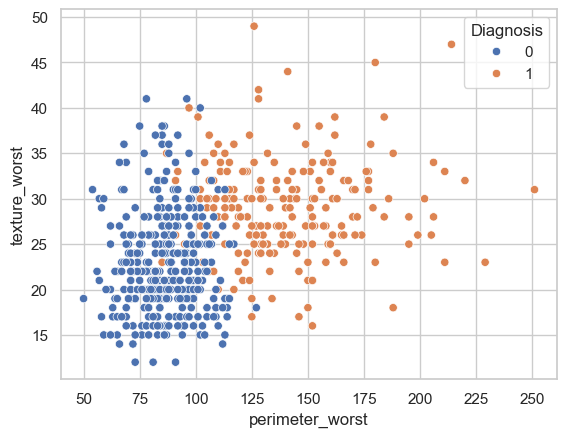

In [141]:
sns.scatterplot(x="perimeter_worst", y="texture_worst", data=data, hue="Diagnosis")

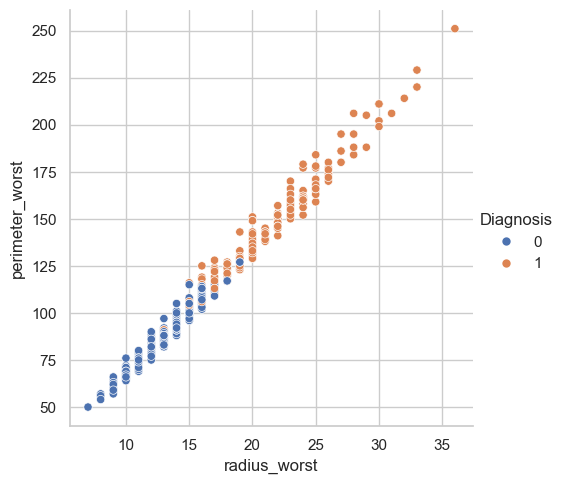

In [142]:
sns.relplot(x="radius_worst",y="perimeter_worst",data=data,hue="Diagnosis")

In [143]:
#Entrenamos el modelo
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3, random_state=42)

In [144]:
#Modelo 1
#Obtenemos la libreria
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [145]:
#generamos el escalonamiento

scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [146]:
#Realizamos la Clasificación
clf = SGDClassifier(loss="log_loss")
clf.fit(trainX, trainY)

SGDClassifier(loss='log_loss')

In [147]:
# Hacemos el Accuracy
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.91


In [148]:
#MATRIZ DE CONFUCIÓN
from sklearn.metrics import confusion_matrix
confusion_matrix(testY,y_pred)

array([[99,  4],
       [11, 57]], dtype=int64)

In [149]:
X = df[df.columns.drop("Diagnosis")]
y = df["Diagnosis"]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

In [151]:
#SEGUNDO MODELO
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [152]:
def draw_tree(X, y, tree: DecisionTreeClassifier):
    viz = dtreeviz(tree, X, y,
                   target_name="diagnosis",
                   feature_names=[str(x) for x in range(X.shape[1])],
                   class_names=list(map(str, list(set(y)))))
    return viz

In [153]:
def draw_tree(X, y, tree: DecisionTreeClassifier):
    viz = dtreeviz(tree, X, y,
                   target_name="diagnosis",
                   feature_names=[str(x) for x in range(X.shape[1])],
                   class_names=list(map(str, list(set(y)))))
    return viz

In [154]:
y_pred = clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))


Accuracy: 0.91


In [155]:
# TERCER MODELO
clf = RandomForestClassifier(max_depth=9)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [156]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.97
